# Hồi Quy Đa Biến: Thực hiện mô hình hồi quy đa biến để xem mối quan hệ giữa giá nhà và nhiều biến độc lập khác nhau, chẳng hạn như diện tích, số phòng ngủ, số phòng tắm, và các yếu tố khác.

In [238]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/ADMIN/Downloads/Data/Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### Phân Tích Ảnh Hưởng Tính Chất Có hoặc Không Có: So sánh giá nhà giữa các trạng thái của các biến như mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea, và furnishingstatus.

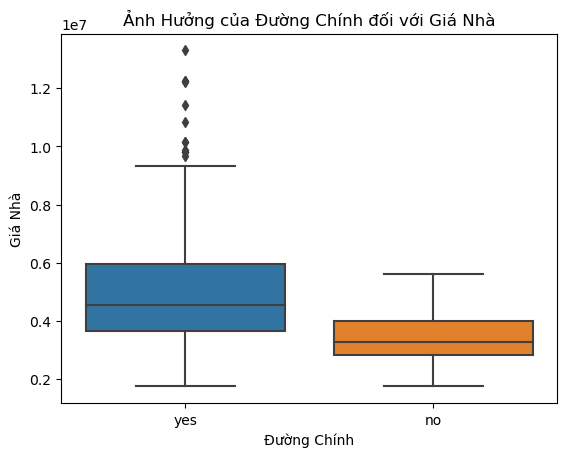

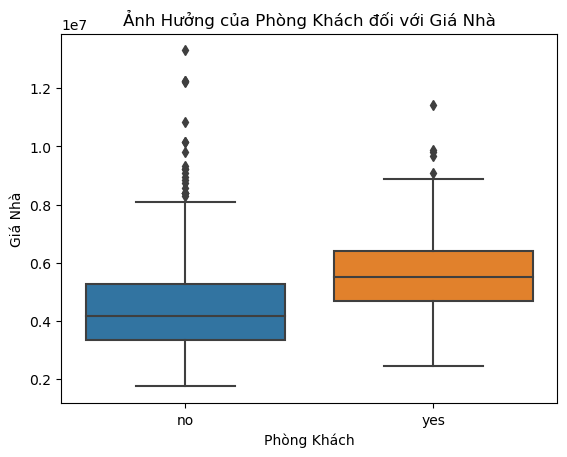

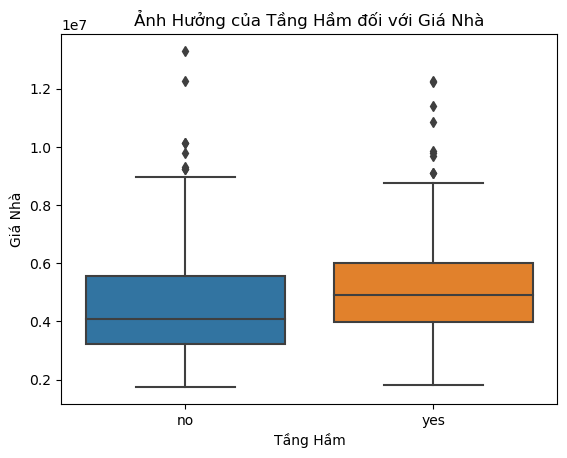

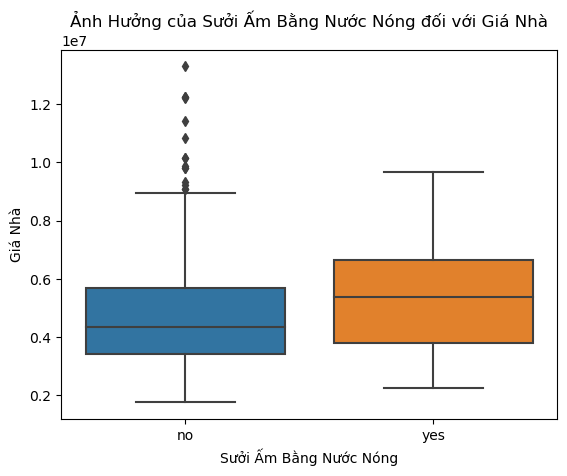

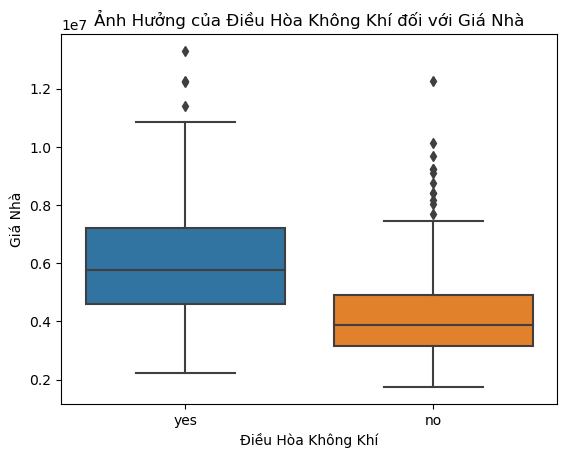

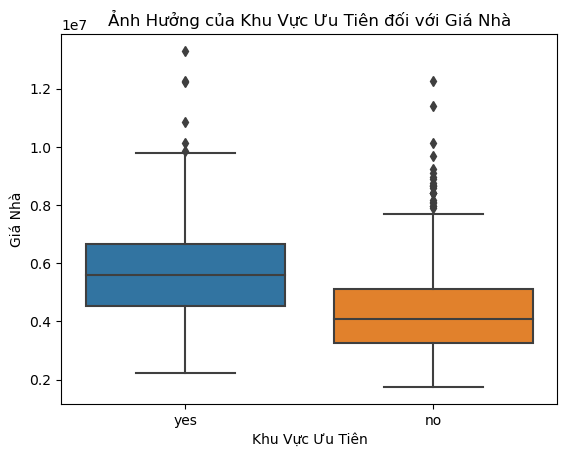

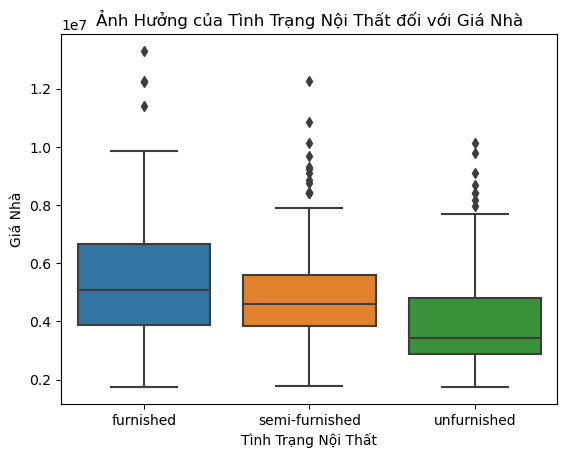

In [239]:
# Phân tích ảnh hưởng của mainroad
sns.boxplot(x='mainroad', y='price', data=df)
plt.title('Ảnh Hưởng của Đường Chính đối với Giá Nhà')
plt.xlabel('Đường Chính')
plt.ylabel('Giá Nhà')
plt.show()

# Phân tích ảnh hưởng của guestroom
sns.boxplot(x='guestroom', y='price', data=df)
plt.title('Ảnh Hưởng của Phòng Khách đối với Giá Nhà')
plt.xlabel('Phòng Khách')
plt.ylabel('Giá Nhà')
plt.show()

# Phân tích ảnh hưởng của basement
sns.boxplot(x='basement', y='price', data=df)
plt.title('Ảnh Hưởng của Tầng Hầm đối với Giá Nhà')
plt.xlabel('Tầng Hầm')
plt.ylabel('Giá Nhà')
plt.show()

# Phân tích ảnh hưởng của hotwaterheating
sns.boxplot(x='hotwaterheating', y='price', data=df)
plt.title('Ảnh Hưởng của Sưởi Ấm Bằng Nước Nóng đối với Giá Nhà')
plt.xlabel('Sưởi Ấm Bằng Nước Nóng')
plt.ylabel('Giá Nhà')
plt.show()

# Phân tích ảnh hưởng của airconditioning
sns.boxplot(x='airconditioning', y='price', data=df)
plt.title('Ảnh Hưởng của Điều Hòa Không Khí đối với Giá Nhà')
plt.xlabel('Điều Hòa Không Khí')
plt.ylabel('Giá Nhà')
plt.show()

# Phân tích ảnh hưởng của prefarea
sns.boxplot(x='prefarea', y='price', data=df)
plt.title('Ảnh Hưởng của Khu Vực Ưu Tiên đối với Giá Nhà')
plt.xlabel('Khu Vực Ưu Tiên')
plt.ylabel('Giá Nhà')
plt.show()

# Phân tích ảnh hưởng của furnishingstatus
sns.boxplot(x='furnishingstatus', y='price', data=df)
plt.title('Ảnh Hưởng của Tình Trạng Nội Thất đối với Giá Nhà')
plt.xlabel('Tình Trạng Nội Thất')
plt.ylabel('Giá Nhà')
plt.show()



In [240]:
df = df[["price","area","bedrooms","bathrooms","stories"]]
df

,price,area,bedrooms,bathrooms,stories
0,13300000,7420,4,2,3
1,12250000,8960,4,4,4
2,12250000,9960,3,2,2
3,12215000,7500,4,2,2
4,11410000,7420,4,1,2
...,...,...,...,...,...
540,1820000,3000,2,1,1
541,1767150,2400,3,1,1
542,1750000,3620,2,1,1
543,1750000,2910,3,1,1


## Chuẩn hóa dữ liệu

In [241]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Chọn các cột cần chuẩn hóa
columns = ["price","area","bedrooms","bathrooms","stories"]
# Chuẩn hóa dữ liệu và gán lại cho DataFrame
df[columns] = scaler.fit_transform(df[columns])

# In DataFrame sau khi chuẩn hóa
df

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18276\25244073.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = scaler.fit_transform(df[columns])


,price,area,bedrooms,bathrooms,stories
0,4.566365,1.046726,1.403419,1.421812,1.378217
1,4.004484,1.757010,1.403419,5.405809,2.532024
2,4.004484,2.218232,0.047278,1.421812,0.224410
3,3.985755,1.083624,1.403419,1.421812,0.224410
4,3.554979,1.046726,1.403419,-0.570187,0.224410
...,...,...,...,...,...
540,-1.576868,-0.991879,-1.308863,-0.570187,-0.929397
541,-1.605149,-1.268613,0.047278,-0.570187,-0.929397
542,-1.614327,-0.705921,-1.308863,-0.570187,-0.929397
543,-1.614327,-1.033389,0.047278,-0.570187,-0.929397


## Phân tích và xử lý nhiễu (noise) và outliers là một phần quan trọng trong quá trình chuẩn bị dữ liệu cho mô hình hồi quy.

### Biểu Đồ Hộp (Boxplot): Sử dụng biểu đồ hộp để kiểm tra sự phân tán của giá trị và xác định sự xuất hiện của outliers.

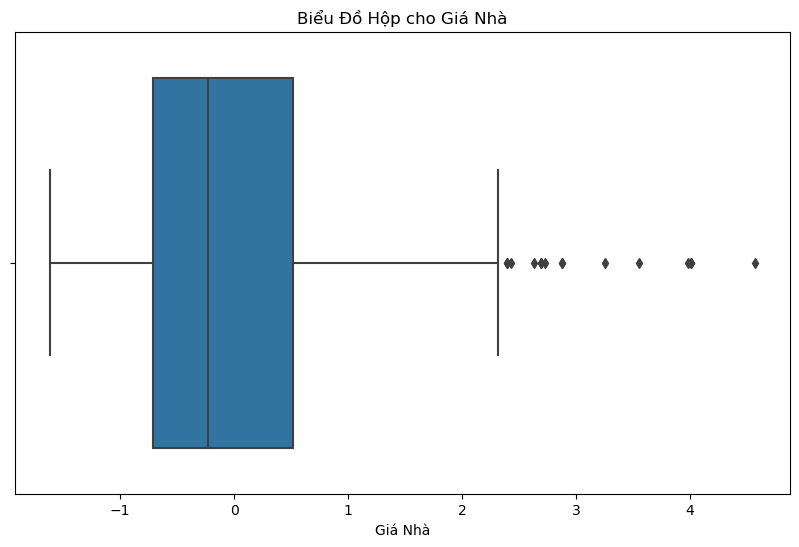

In [242]:
# Vẽ biểu đồ hộp cho giá nhà
plt.figure(figsize=(10, 6))
sns.boxplot(x='price', data=df)
plt.title('Biểu Đồ Hộp cho Giá Nhà')
plt.xlabel('Giá Nhà')

# Thêm chú thích
plt.annotate('Outliers', xy=(0.5, df['price'].max()), xytext=(0.5, df['price'].max() + 500000),
             arrowprops=dict(facecolor='red', arrowstyle='wedge,tail_width=0.7', lw=1),
             fontsize=10, color='red', ha='center', va='center')

plt.show()



### Xử lí các Oulier bằng giá trị trung bình

In [243]:
# Tính toán z-score
z_scores = (df[columns] - df[columns].mean()) / df[columns].std()

# Xác định ngưỡng z-score (ví dụ: ngưỡng = 3)
threshold = 3

# Xác định các giá trị ngoại lệ
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Thay thế giá trị ngoại lệ bằng giá trị trung bình
df[columns] = np.where(outliers, df[columns].mean(), df[columns])

# In DataFrame sau khi thay thế giá trị ngoại lệ bằng giá trị trung bình
df

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18276\687270342.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = np.where(outliers, df[columns].mean(), df[columns])


,price,area,bedrooms,bathrooms,stories
0,2.085997e-16,1.046726,1.403419,1.421812e+00,1.378217
1,2.085997e-16,1.757010,1.403419,-2.607496e-17,2.532024
2,2.085997e-16,2.218232,0.047278,1.421812e+00,0.224410
3,2.085997e-16,1.083624,1.403419,1.421812e+00,0.224410
4,2.085997e-16,1.046726,1.403419,-5.701867e-01,0.224410
...,...,...,...,...,...
540,-1.576868e+00,-0.991879,-1.308863,-5.701867e-01,-0.929397
541,-1.605149e+00,-1.268613,0.047278,-5.701867e-01,-0.929397
542,-1.614327e+00,-0.705921,-1.308863,-5.701867e-01,-0.929397
543,-1.614327e+00,-1.033389,0.047278,-5.701867e-01,-0.929397


### Kiểm Tra Lại Biểu Đồ Hộp: Vẽ lại biểu đồ hộp sau khi xử lý outliers để đảm bảo tính ổn định.

Text(0.5, 0, 'Giá Nhà')

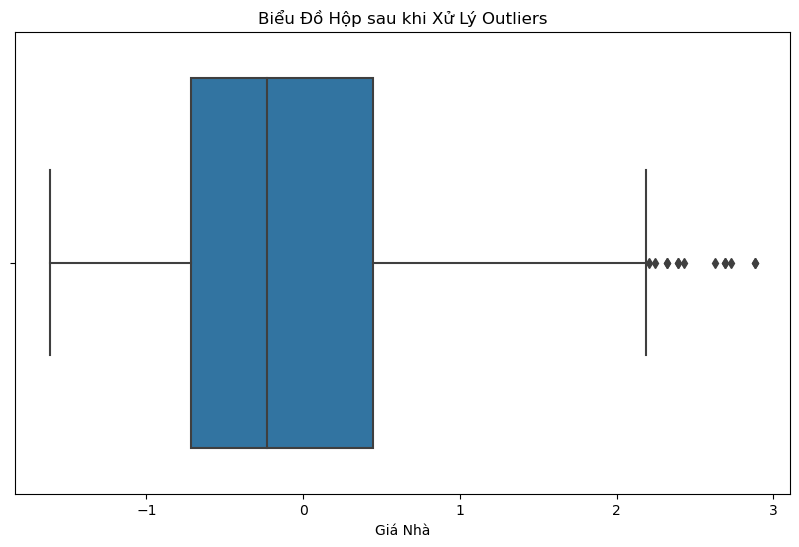

In [244]:
# Vẽ biểu đồ hộp sau khi xử lý outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Biểu Đồ Hộp sau khi Xử Lý Outliers')
plt.xlabel('Giá Nhà')


## Chia mô hình

In [245]:
X = df.iloc[:,[1,2,3,4]]
y = df.iloc[:,0]
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Tạo mô hình - huấn luyện - dự đoán

In [246]:
# Tạo mô hình hồi quy
model = LinearRegression()

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

# Dự đoán giá trên tập kiểm tra
y_pred = model.predict(X_test)
y_pred

array([ 0.74978055,  0.9804725 , -0.70136851, -0.17031621, -0.60120087,
       -0.07029856,  0.27594207,  0.57473667, -0.85525323, -0.84356931,
        1.27627991, -0.72175823, -0.7629224 , -0.53579243, -0.3684428 ,
       -0.25310697, -0.86294004,  0.0220397 , -0.00681369, -0.32435093,
        0.29519994, -0.05010119, -0.77657967, -0.4011433 ,  0.22400597,
        1.41518943, -0.88410662,  0.07639231, -0.1413587 , -0.67058414,
        0.26874821, -0.53194532,  0.88429455,  0.14033858, -0.09804018,
        0.38416176, -0.2384102 , -0.40484785, -0.69353171,  0.15097661,
        0.17206988, -0.78023443,  0.96508403, -0.32420094, -0.180084  ,
       -0.34647186,  1.11512906, -0.12400823,  0.06997868, -0.90141865,
        1.39885403, -0.90141865,  0.01611903, -0.26649416, -0.31636413,
       -0.80317457,  1.06704009, -0.67044157,  0.22415597, -0.74753393,
       -0.23537426, -0.08999555, -0.23971433, -0.52440107, -0.10106808,
       -0.40883754,  1.1149865 , -0.55502803,  1.06091902, -0.26

## Đánh giá hiệu suất mô hình

In [247]:
# Đánh giá hiệu suất của mô hình
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', metrics.r2_score(y_test, y_pred))

# In hệ số và sai số chệch của mô hình
print('\nHệ số hồi quy:')
print(model.coef_)

print('\nSai số chệch (intercept):')
print(model.intercept_)


Mean Absolute Error: 0.6192140428107005
Mean Squared Error: 0.6765766675968922
Root Mean Squared Error: 0.822542805935893
R-squared: 0.39757238795959104

Hệ số hồi quy:
[0.4170563  0.08520951 0.31697833 0.20006341]

Sai số chệch (intercept):
-0.009546691476439467


## Trực quan hóa mô hình

### So sánh giá nhà thực tế và giá nhà dự đoán

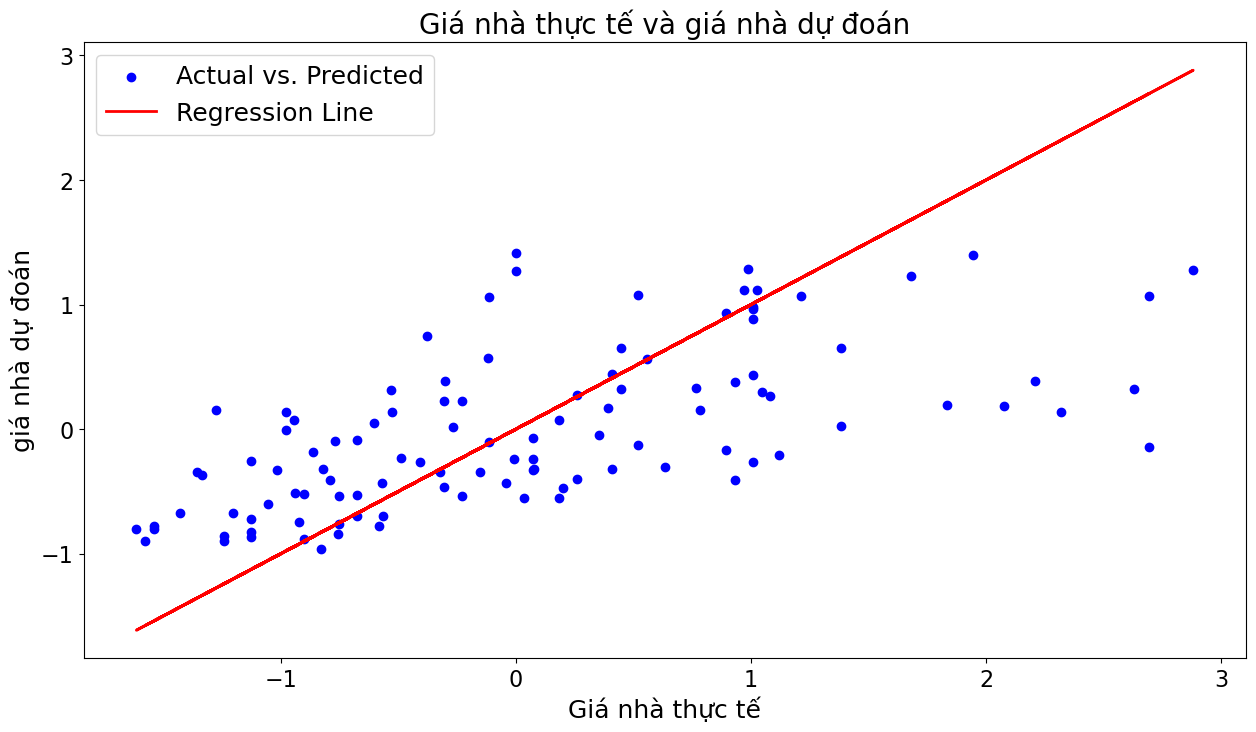

In [248]:
# Vẽ biểu đồ trực quan hóa hồi quy tuyến tính đa biến
plt.figure(figsize=(15, 8))

# Biểu đồ dữ liệu thực tế
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')

# Đường thẳng hồi quy
plt.plot(y_test, y_test, color='red', linewidth=2, label='Regression Line')

plt.title('Giá nhà thực tế và giá nhà dự đoán',fontsize=20)
plt.xlabel('Giá nhà thực tế',fontsize=18)
plt.ylabel('giá nhà dự đoán',fontsize=18)
plt.tick_params(axis='x', labelsize=16) 
plt.tick_params(axis='y', labelsize=16)  
plt.legend(fontsize=18)
plt.show()

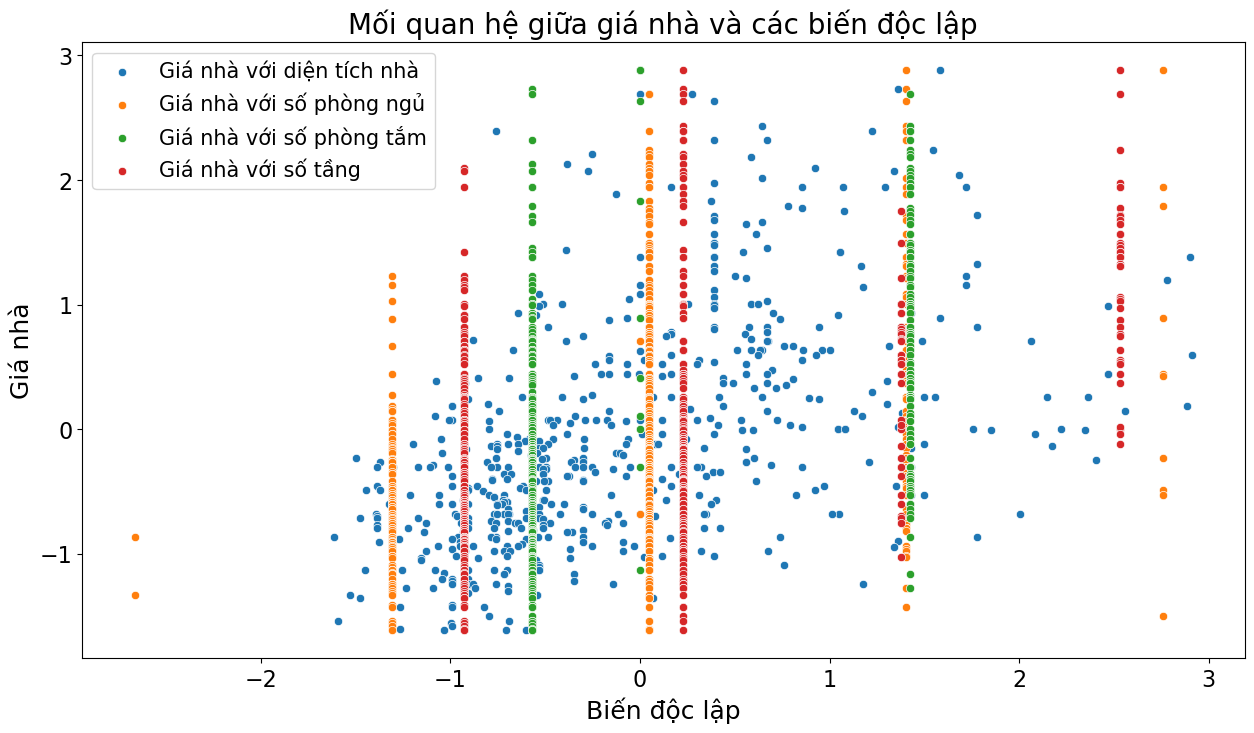

In [249]:
import seaborn as sns

plt.figure(figsize=(15, 8))

# Tạo đồ thị phân tán của giá nhà với diện tích nhà
sns.scatterplot(x="area", y="price", data=df,label = "Giá nhà với diện tích nhà")

# Tạo đồ thị phân tán của giá nhà với số phòng ngủ
sns.scatterplot(x="bedrooms", y="price", data=df,label = "Giá nhà với số phòng ngủ")

# Tạo đồ thị phân tán của giá nhà với số phòng tắm
sns.scatterplot(x="bathrooms", y="price", data=df, label = "Giá nhà với số phòng tắm")

# Tạo đồ thị phân tán của giá nhà với số tầng
sns.scatterplot(x="stories", y="price", data=df, label = "Giá nhà với số tầng")

plt.title('Mối quan hệ giữa giá nhà và các biến độc lập',fontsize=20)
plt.xlabel('Biến độc lập',fontsize=18)
plt.ylabel('Giá nhà',fontsize=18)
plt.tick_params(axis='x', labelsize=16) 
plt.tick_params(axis='y', labelsize=16)  
plt.legend(fontsize=15)
plt.show()
